In [63]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

In [64]:
sigm = lambda x: 1/(1+np.exp(-x))

In [65]:
class Layer:
    
    def __init__(self, NC, NN, ActFunc):
        
        self.NC = NC
        self.NN = NN
        self.ActFunc = ActFunc
        
        self.W = np.random.uniform( -10,10, size=(self.NC,self.NN) )
        self.b = np.random.uniform( -10,10, size=(1,self.NN) )
        
    def Activation(self,x):
        z = np.dot(x,self.W) + self.b
        return self.ActFunc(z)[0]
    
    def Mutate(self):
        self.W += np.random.normal( loc=0.,scale=0.05,size=(self.NC,self.NN) )
        self.b += np.random.normal( loc=0.,scale=0.05,size=(1,self.NN) )

In [66]:
l0 = Layer(2,4,sigm)
l1 = Layer(4,10,sigm)
l2 = Layer(10,5,sigm)
l3 = Layer(5,2,sigm)
Layers = [l0,l1,l2,l3]

In [67]:
Layers # Red neuronal

In [68]:
def Brain(Layers,x):
    
    for i in range(len(Layers)):
        
        if i==0:
            output = Layers[i].Activation(x)
        else:
            output = Layers[i].Activation(output)
        
    return output

In [69]:
Brain(Layers,[1,1.2])

array([0.37860418, 0.48013329])

In [70]:
x = np.linspace(-1,1,10)
y = x.copy()

X,Y = np.meshgrid(x,y)

N1 = np.zeros_like(X)
N2 = np.zeros_like(X)

for i, _x in enumerate(x):
    for j, _y in enumerate(y):
        N1[i,j] = Brain(Layers,[_x,_y])[0]
        N2[i,j] = Brain(Layers,[_x,_y])[1]

<IPython.core.display.Javascript object>


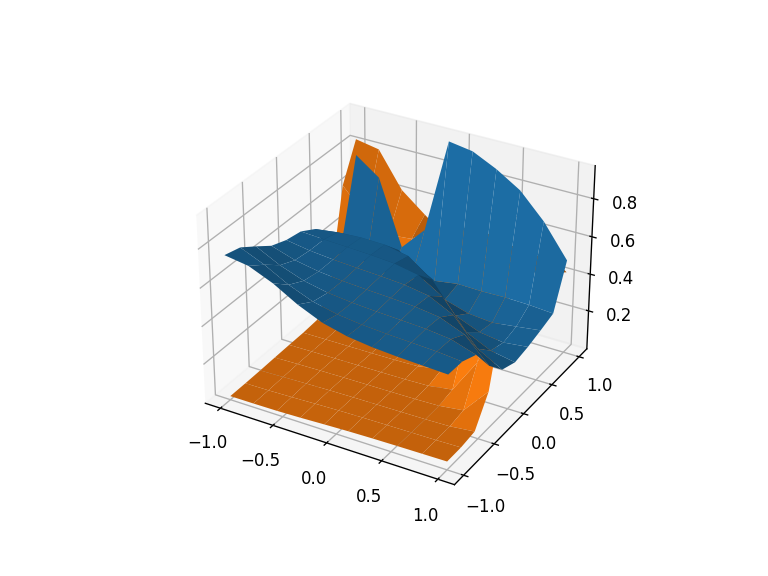

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.plot_surface(X,Y,N1)
ax.plot_surface(X,Y,N2)